# K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.plot_functions import *
from src.knn_algorithm import KNN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

### Selecting dataset **Iris Flower Dataset:**
**Iris Dataset Features:**
* **Number of instances (samples):** 150
* **Number of features:** 4 (sepal length and width, petal length and width)
* **Number of classes (labels):** 3 (Setosa, Versicolor and Virginica)
* **Class distribution:** Balanced (each class has 50 instances)

In [2]:
iris = load_iris()

In [3]:
X, y = iris.data, iris.target

### Iris DataFrame Distribution

In [4]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


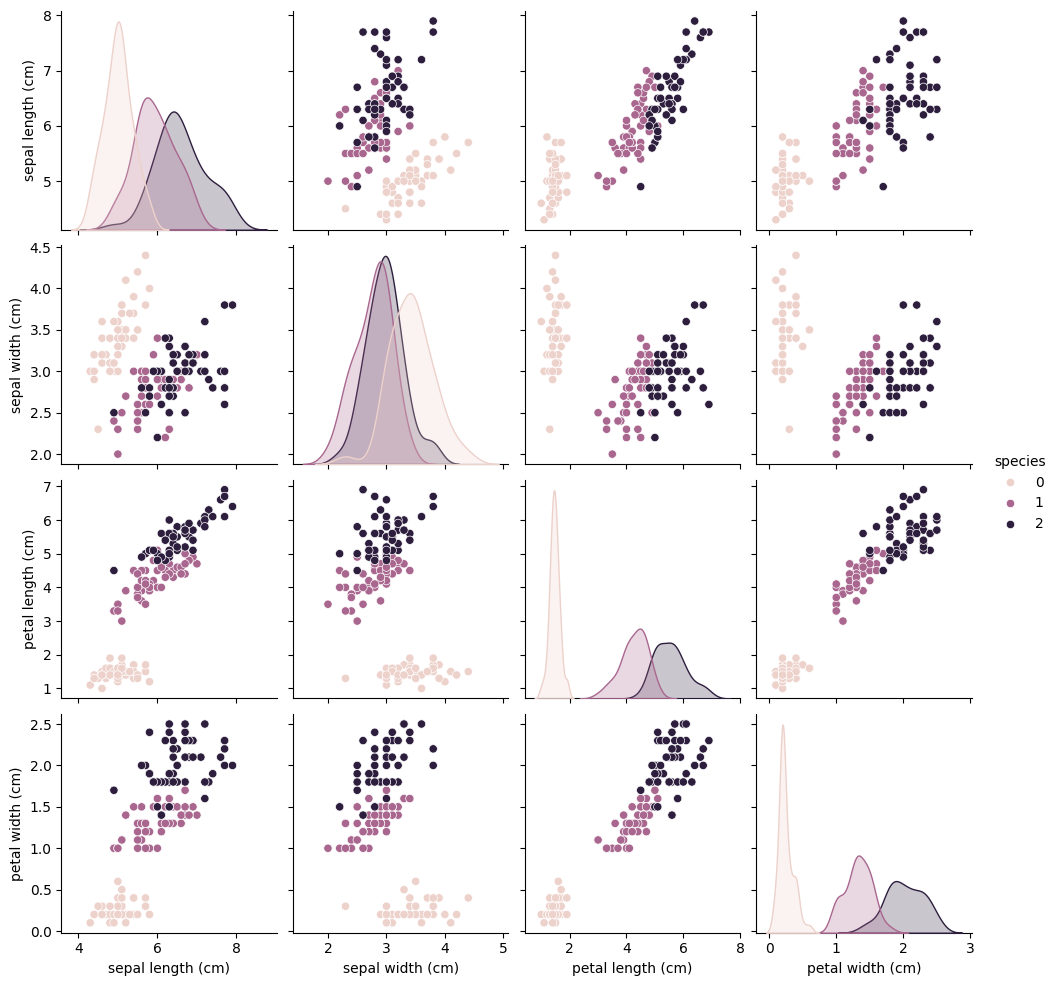

In [5]:
sns.pairplot(iris_df, hue="species")
plt.show()

## KNN for Iris dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

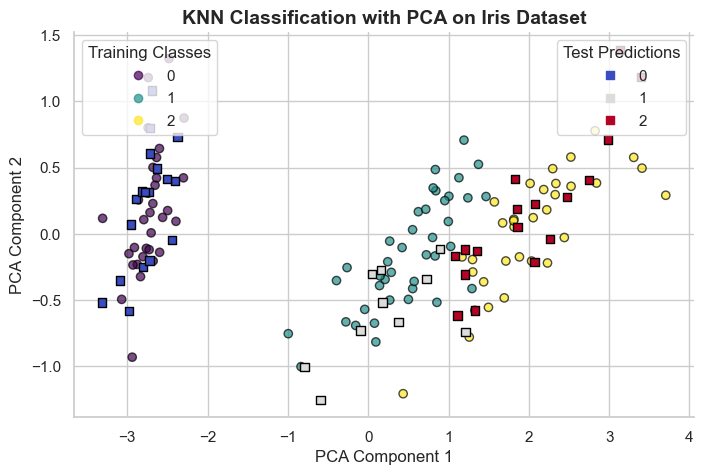

In [8]:
plot_knn_pca(X_train, y_train, X_test, y_pred, "Iris Dataset")

**Interpretation:**
- The plot uses PCA to reduce the dimensionality of the Iris data set, allowing visualization in a two-dimensional space.
- The training points are dispersed in this space according to their main components.
- The predictions for the test data are overlaid in the same space, allowing the KNN model predictions to be visually compared with the distribution of the training classes.

**Purpose:**
- Visually evaluate the performance of the KNN model.
- Verify how test predictions align with the structure of the training data.

In [9]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy score:  0.96
F1 score:  0.95


### Confusion Matrix

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

[Confusion matrix using Iris dataset example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

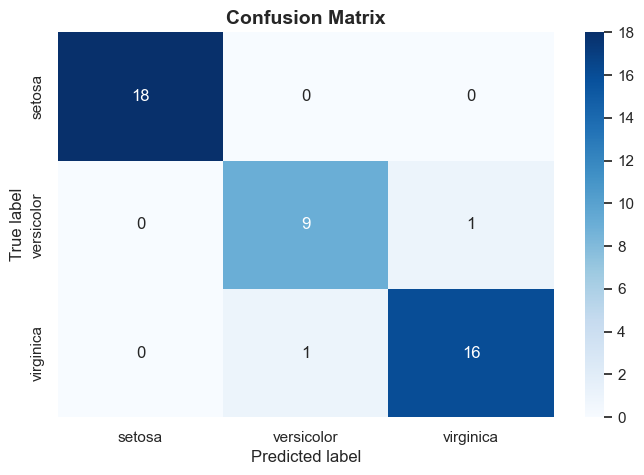

In [10]:
plot_confusion_matrix(y_test, y_pred, labels=np.unique(iris.target_names))

## Scaled Iris dataset

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)

In [13]:
print(classification_report(y_test, y_pred_scaled))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred_scaled), 2))
print("F1 score: ", round(f1_score(y_test, y_pred_scaled, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.82      0.90      0.86        10
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45

Accuracy score:  0.93
F1 score:  0.92


## Elbow method

### Custom KNN implementation

In [14]:
max_k = 40
f1_scores = np.zeros(max_k)
error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    f1_scores[k - 1] = score
    error_rates[k - 1] = error

### SKLearn implementation

In [15]:
sklearn_f1_scores = np.zeros(max_k)
sklearn_error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    sklearn_f1_scores[k - 1] = score
    sklearn_error_rates[k - 1] = error

### Custom vs sklearn results

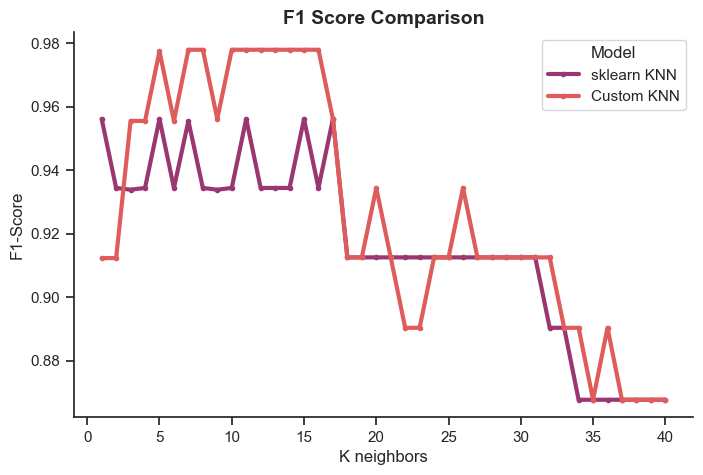

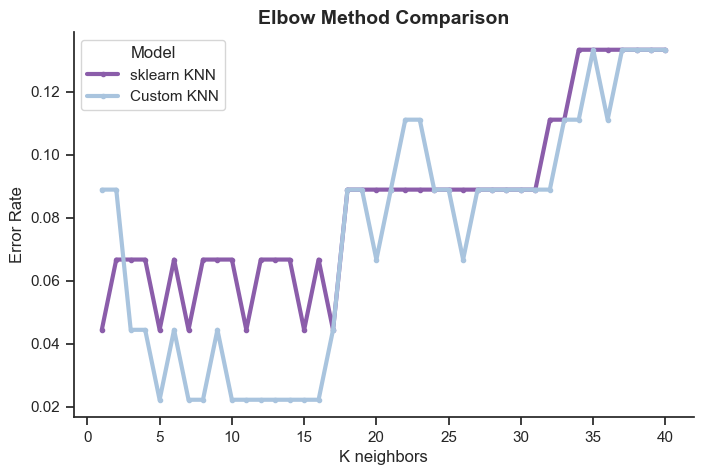

In [16]:
plot_f1_score(max_k, f1_scores, sklearn_f1_scores, "F1 Score Comparison")
plot_elbow(max_k, error_rates, sklearn_error_rates, "Elbow Method Comparison")

The results you have obtained show some fluctuations in the F1-Score as the number of neighbors k varies, both for the custom KNN implementation and for sklearn's KNeighborsClassifier.
Here are some key points to consider:
- **Overall Similarity:**
    - The general shape of the two curves is quite similar, indicating that custom KNN implementation is working correctly and producing results comparable to the sklearn implementation.
- **Fluctuations:**
    - Fluctuations in the F1-Score as it changes k are normal and may be due to how the data is divided, the specific characteristics of the dataset, and the nature of the KNN method.
    - These fluctuations also reflect how different values of k can cause the model to overfit or underfit the data.
- **Overall Performance:**
    - Both models show a high F1-Score for lower values of k (1-10), which is expected since in small datasets like Iris, low values of k tend to work well.
    - As k increases, precision decreases, which is also expected since the model tends to oversimplify.

---

## Custom dataset for test KNN
Creating custom datasets offers complete control over dataset characteristics, allowing for adjustments in the number of samples, features, and class separation to evaluate model performance in various scenarios. Introducing controlled noise simulates real-world conditions, testing the algorithm's robustness. Additionally, quick generation and full understanding of the dataset facilitate detailed analysis and fine-tuning of the model. The repeatability of experiments ensures consistent results, and using synthetic data avoids legal and privacy issues. These benefits are ideal for demonstrating concepts in presentations and optimizing the model before applying it to real-world data.
* [Proclus Academy Examples](https://proclusacademy.com/blog/sklearn_make_classification/)

### First Custom Dataset (Balanced)

In [17]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_classes=2,
    # flip_y - high value to add more noise
    flip_y=0.1,
    # class_sep - low value to reduce space between classes
    class_sep=0.5,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

n_neighbors = 3

model = KNN(k=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, False)

In [18]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        92
           1       0.84      0.86      0.85       108

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Accuracy score:  0.83
F1 score:  0.83


**Model comparasion between Custom and sklearn KNN model**

In [19]:
max_k = 40

# Custom KNN
f1_scores = np.zeros(max_k)
error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    f1_scores[k - 1] = score
    error_rates[k - 1] = error

# sklearn KNN
sklearn_f1_scores = np.zeros(max_k)
sklearn_error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    sklearn_f1_scores[k - 1] = score
    sklearn_error_rates[k - 1] = error

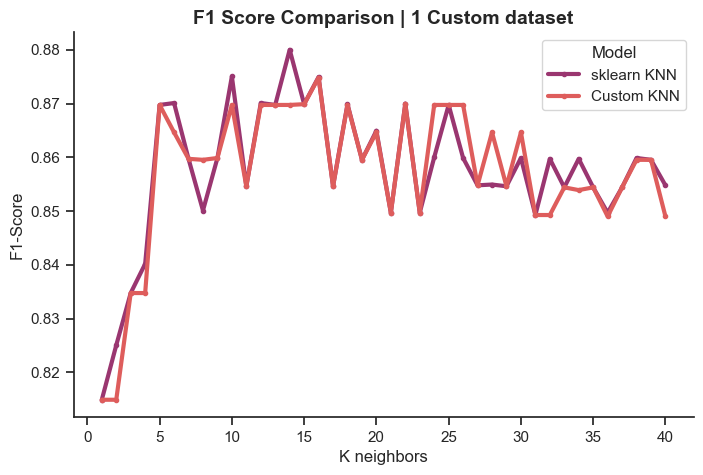

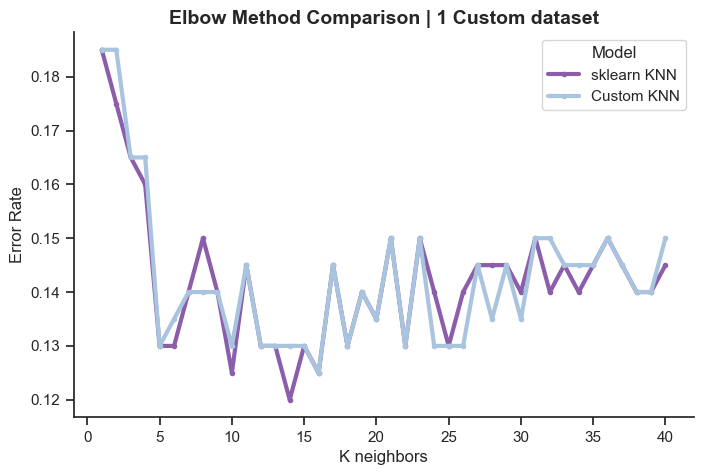

In [20]:
plot_f1_score(max_k, f1_scores, sklearn_f1_scores, "F1 Score Comparison | 1 Custom dataset")
plot_elbow(max_k, error_rates, sklearn_error_rates, "Elbow Method Comparison | 1 Custom dataset")

---

### Second Custom Dataset (Imbalanced)

In [21]:
X, y = make_classification(
    # the usual parameters
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_classes=2,
    # Set label 0 for  97% and 1 for rest 3% of observations
    weights=[0.97],
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

n_neighbors = 3

model = KNN(k=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, False)

In [22]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       191
           1       1.00      0.11      0.20         9

    accuracy                           0.96       200
   macro avg       0.98      0.56      0.59       200
weighted avg       0.96      0.96      0.94       200

Accuracy score:  0.96
F1 score:  0.59


**Model comparasion between Custom and sklearn KNN model**

In [23]:
max_k = 40

# Custom KNN
f1_scores = np.zeros(max_k)
error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    f1_scores[k - 1] = score
    error_rates[k - 1] = error

# sklearn KNN
sklearn_f1_scores = np.zeros(max_k)
sklearn_error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    sklearn_f1_scores[k - 1] = score
    sklearn_error_rates[k - 1] = error

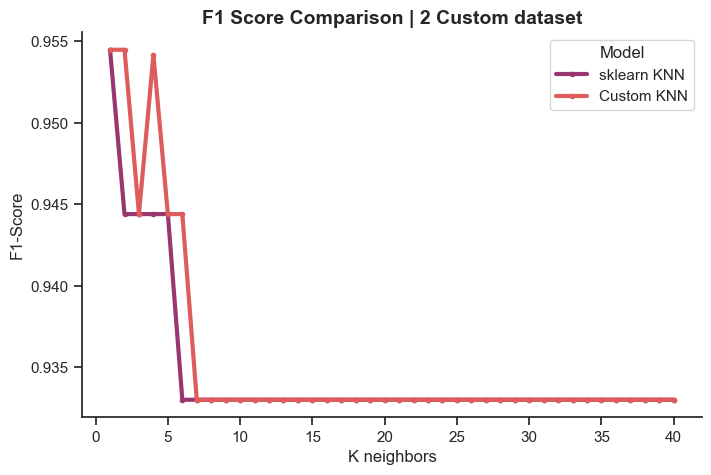

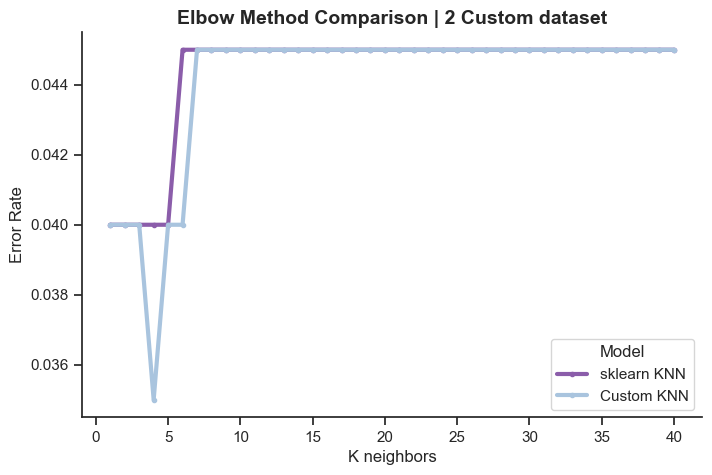

In [24]:
plot_f1_score(max_k, f1_scores, sklearn_f1_scores, "F1 Score Comparison | 2 Custom dataset")
plot_elbow(max_k, error_rates, sklearn_error_rates, "Elbow Method Comparison | 2 Custom dataset")

---

### Third Custom Dataset (Multiclass)

In [25]:
X, y = make_classification(
    # same parameters as usual
    n_samples=1000,
    n_features=5,
    n_informative=3,
    # create target label with 3 classes
    n_classes=3,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

n_neighbors = 3

model = KNN(k=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, False)

In [26]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        67
           1       0.84      0.91      0.87        64
           2       0.85      0.77      0.81        69

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200

Accuracy score:  0.85
F1 score:  0.85


**Model comparasion between Custom and sklearn KNN model**

In [27]:
max_k = 40

# Custom KNN
f1_scores = np.zeros(max_k)
error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    f1_scores[k - 1] = score
    error_rates[k - 1] = error

# sklearn KNN
sklearn_f1_scores = np.zeros(max_k)
sklearn_error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    sklearn_f1_scores[k - 1] = score
    sklearn_error_rates[k - 1] = error

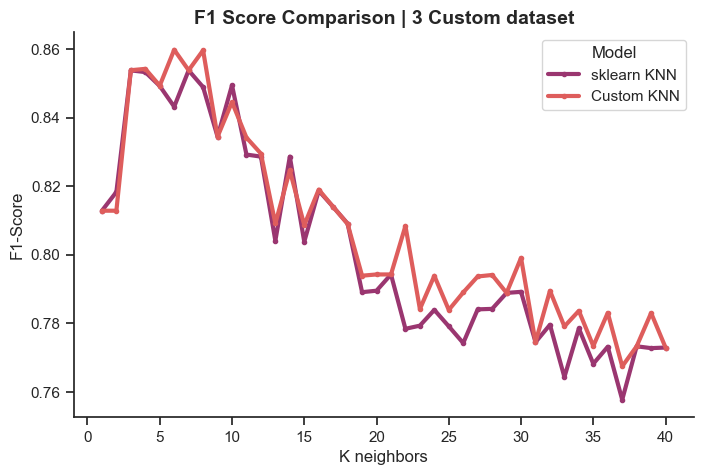

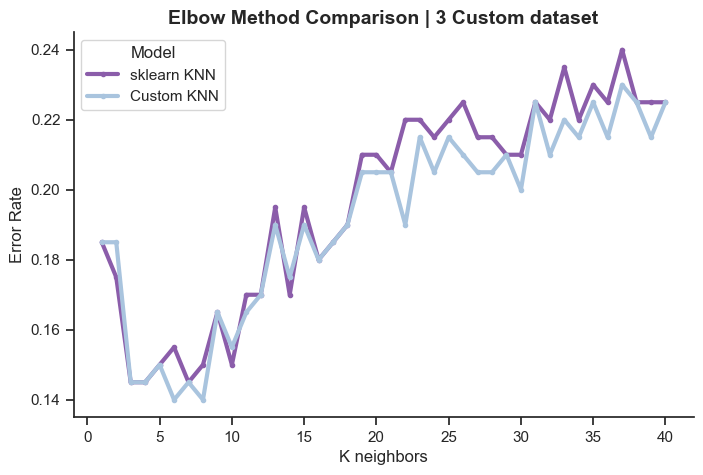

In [28]:
plot_f1_score(max_k, f1_scores, sklearn_f1_scores, "F1 Score Comparison | 3 Custom dataset")
plot_elbow(max_k, error_rates, sklearn_error_rates, "Elbow Method Comparison | 3 Custom dataset")

---

### Fourth Custom Dataset (Multiclass imbalanced)

In [29]:
X, y = make_classification(
    # same parameters as usual
    n_samples=1000,
    n_features=5,
    n_informative=3,
    # create target label with 3 classes
    n_classes=3,
    # assign 4% of rows to class 0, 48% to class 1
    # and the rest to class 2
    weights=[0.04, 0.48],
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

n_neighbors = 3

model = KNN(k=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, False)

In [30]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.86      0.90      0.88        98
           2       0.87      0.85      0.86        96

    accuracy                           0.87       200
   macro avg       0.91      0.81      0.85       200
weighted avg       0.87      0.87      0.87       200

Accuracy score:  0.87
F1 score:  0.85


**Model comparasion between Custom and sklearn KNN model**

In [31]:
max_k = 40

# Custom KNN
f1_scores = np.zeros(max_k)
error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    f1_scores[k - 1] = score
    error_rates[k - 1] = error

# sklearn KNN
sklearn_f1_scores = np.zeros(max_k)
sklearn_error_rates = np.zeros(max_k)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = f1_score(y_test, y_pred, average="weighted")
    error = 1 - np.round(accuracy_score(y_test, y_pred), 4)

    sklearn_f1_scores[k - 1] = score
    sklearn_error_rates[k - 1] = error

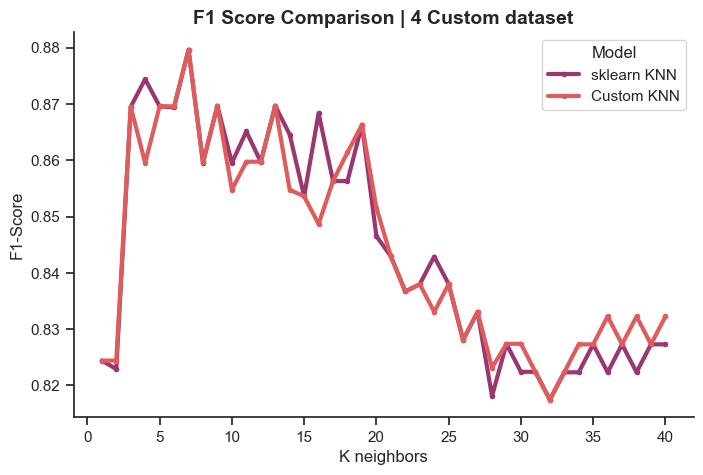

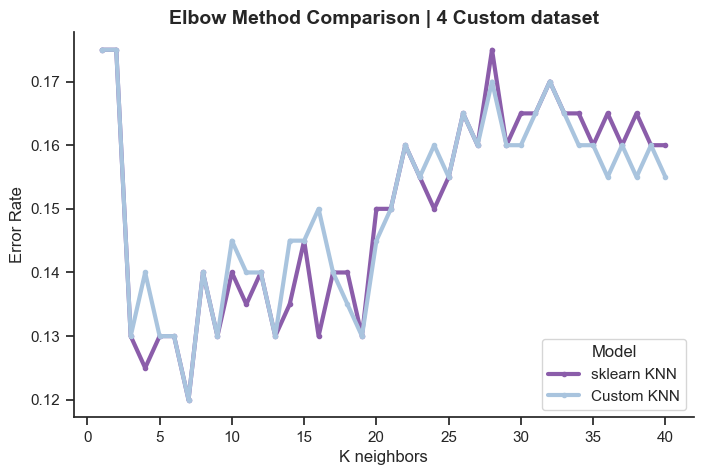

In [32]:
plot_f1_score(max_k, f1_scores, sklearn_f1_scores, "F1 Score Comparison | 4 Custom dataset")
plot_elbow(max_k, error_rates, sklearn_error_rates, "Elbow Method Comparison | 4 Custom dataset")